<p style="font-size:40px">5. Feature Importances</p> <br>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import make_scorer, plot_confusion_matrix, confusion_matrix, classification_report, f1_score, precision_score, recall_score, matthews_corrcoef, roc_auc_score

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, binarize
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import binarize, OneHotEncoder

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle
import warnings
warnings.filterwarnings("ignore")

In [4]:
bank = pd.read_csv('bank_clean.csv')

X = bank.drop('y', axis = 1)
y = bank['y'].map({'yes' : 1, 'no' : 0})

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [6]:
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age']),
        ('cat', categorical_transformer, ['month','pdays'])])

In [7]:
sm = SMOTE(random_state=101, sampling_strategy=1.0)

In [8]:
rfc_tuned_smote = Pipeline(steps=[('preprocessor', preprocessor), ('sm', sm),
                      ('rfc', RandomForestClassifier(random_state = 101, n_estimators = 300,
                                                   max_features = 0.8, min_samples_leaf = 35, 
                                                     max_depth = 8))])

rfc_tuned_smote.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   RobustScaler(copy=True,
                                                                                quantile_range=(25.0,
                                                                                                75.0),
                                                                                with_centering=True,
                                                                                with_scaling=True))],
                                                        

In [17]:
pd.get_dummies(X_train[['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age','month','pdays']]).columns

Index(['emp.var.rate', 'euribor3m', 'nr.employed', 'cons.price.idx',
       'cons.conf.idx', 'age', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'pdays_Contacted',
       'pdays_Never contacted before'],
      dtype='object')

In [11]:
rfc_tuned_smote['rfc'].feature_importances_

array([5.65743850e-02, 3.15365119e-01, 4.55613882e-01, 2.63787338e-02,
       6.69754171e-02, 3.03773613e-02, 1.73503659e-03, 4.38862574e-04,
       9.49950148e-06, 6.02674291e-04, 2.06454456e-04, 1.07238283e-03,
       4.76674661e-03, 2.70082006e-04, 1.97722322e-02, 4.40444876e-05,
       1.05527918e-02, 9.24429458e-03])

In [35]:
feat = pd.DataFrame({'feature_impotances' : rfc_tuned_smote['rfc'].feature_importances_}, index = pd.get_dummies(X_train[['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age',
                                                                                                 'month','pdays']]).columns).sort_values(ascending = False, by = 'feature_impotances')

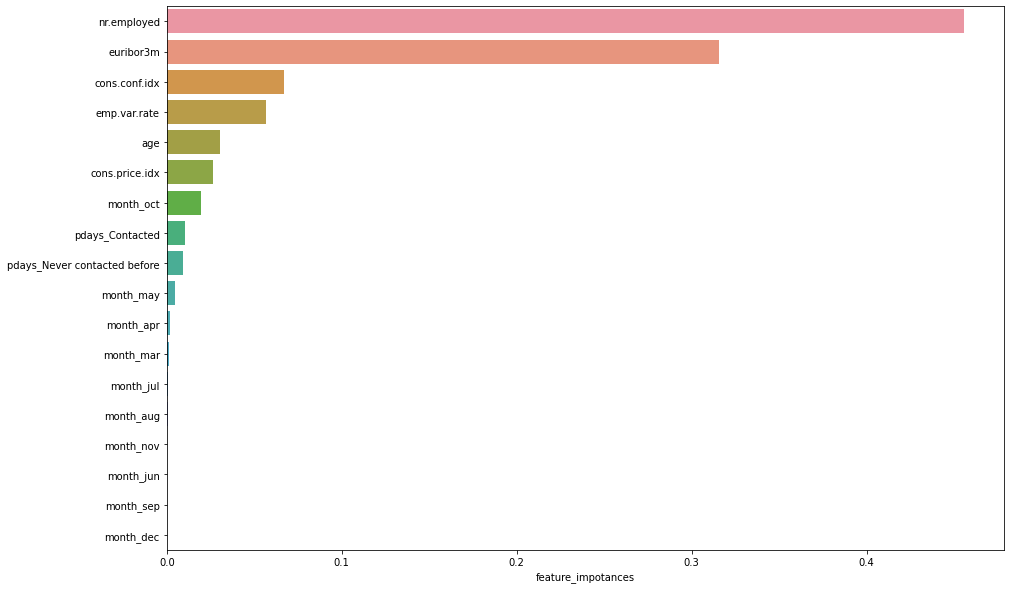

In [36]:
plt.figure(figsize = (15, 10))
sns.barplot(x = feat['feature_impotances'], y = feat.index)

> Dari visualisasi diatas, dapat dilihat bahwa fitur nr.employed adalah fitur yang paling membantu model random forest untuk membedakan nasabah yang akan melakukan deposito atau tidak. Dan empat teratas adalah fitur-fitur socio-economics, yang dimana sebetulnya tidak mengherankan, mengingat fitur-fitur itu saling berkorelasi. Kalau mengingat di notebook ML_Classification_Part_1 telah ditunjukkannya korelasi tiap fitur. Dan bisa dilihat bahwa fitur nr.employed adalah fitur paling berkorelasi ke fitur target. Mengingat nr.employed adalah jumlah karyawan dari bank tersebut. Artinya bank mengontrol betul, nasabahnya akan melakukan deposito atau tidak. Seharusnya dengan hasil di atas, bank lebih dapat membuat strategi kedepannya. 